In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("/content/social_media.csv")

# Display the structure of the dataset
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  178 non-null    object 
 1   Facebook              178 non-null    float64
 2   Pinterest             178 non-null    float64
 3   Twitter               178 non-null    float64
 4   StumbleUpon           178 non-null    float64
 5   YouTube               178 non-null    float64
 6   Instagram             178 non-null    float64
 7   Tumblr                178 non-null    float64
 8   reddit                178 non-null    float64
 9   VKontakte             178 non-null    float64
 10  LinkedIn              178 non-null    float64
 11  Google+               178 non-null    float64
 12  Digg                  178 non-null    float64
 13  MySpace               178 non-null    float64
 14  Fark                  178 non-null    float64
 15  NowP

In [ ]:
df.head()

,Date,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,...,MySpace,Fark,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other
0,2009-04,20.16,0.0,6.86,36.79,0.0,0.0,0.0,8.98,0.0,...,14.81,0.22,0.04,0.29,0.08,0.49,1.75,0.0,0.0,2.83
1,2009-05,24.30,0.0,9.95,33.78,0.0,0.0,0.0,7.62,0.0,...,8.95,0.44,0.05,2.10,0.12,0.57,1.77,0.0,0.0,2.72
2,2009-06,26.48,0.0,10.56,29.65,0.0,0.0,0.0,12.13,0.0,...,7.66,0.66,0.05,2.35,0.11,0.58,1.46,0.0,0.0,1.93
3,2009-07,29.10,0.0,10.35,33.55,0.0,0.0,0.0,9.52,0.0,...,5.49,0.22,0.03,2.21,0.14,0.55,1.24,0.0,0.0,1.84
4,2009-08,34.25,0.0,11.15,29.01,0.0,0.0,0.0,9.37,0.0,...,4.69,0.40,0.08,2.27,0.08,0.52,1.27,0.0,0.0,1.90


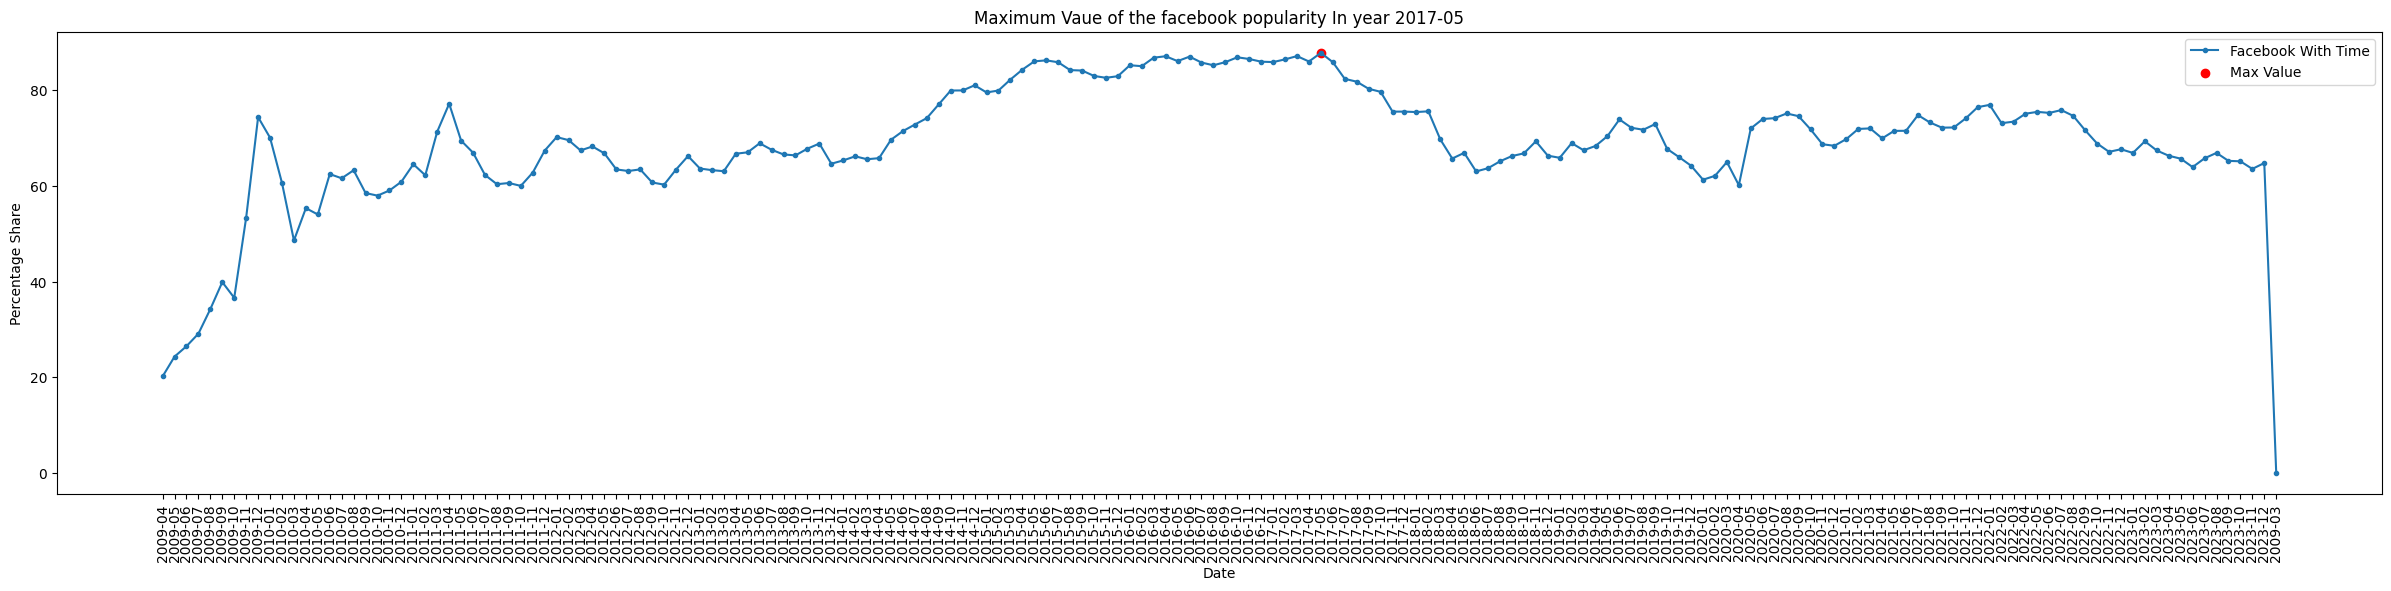

In [ ]:
# How  the popularity of the facebook varies with time
plt.figure(figsize=(30, 6))
plt.xticks(rotation=90)
max_index = df['Facebook'].idxmax()
plt.plot(df['Date'], df['Facebook'], label="Facebook With Time",marker=".")
plt.scatter(df['Date'][max_index], df['Facebook'][max_index], color='red', marker='o', label='Max Value')
plt.xlabel('Date')
plt.title("Maximum Vaue of the facebook popularity In year {}".format(df['Date'][max_index]))
plt.xticks(rotation=90)
plt.ylabel('Percentage Share')

plt.legend()

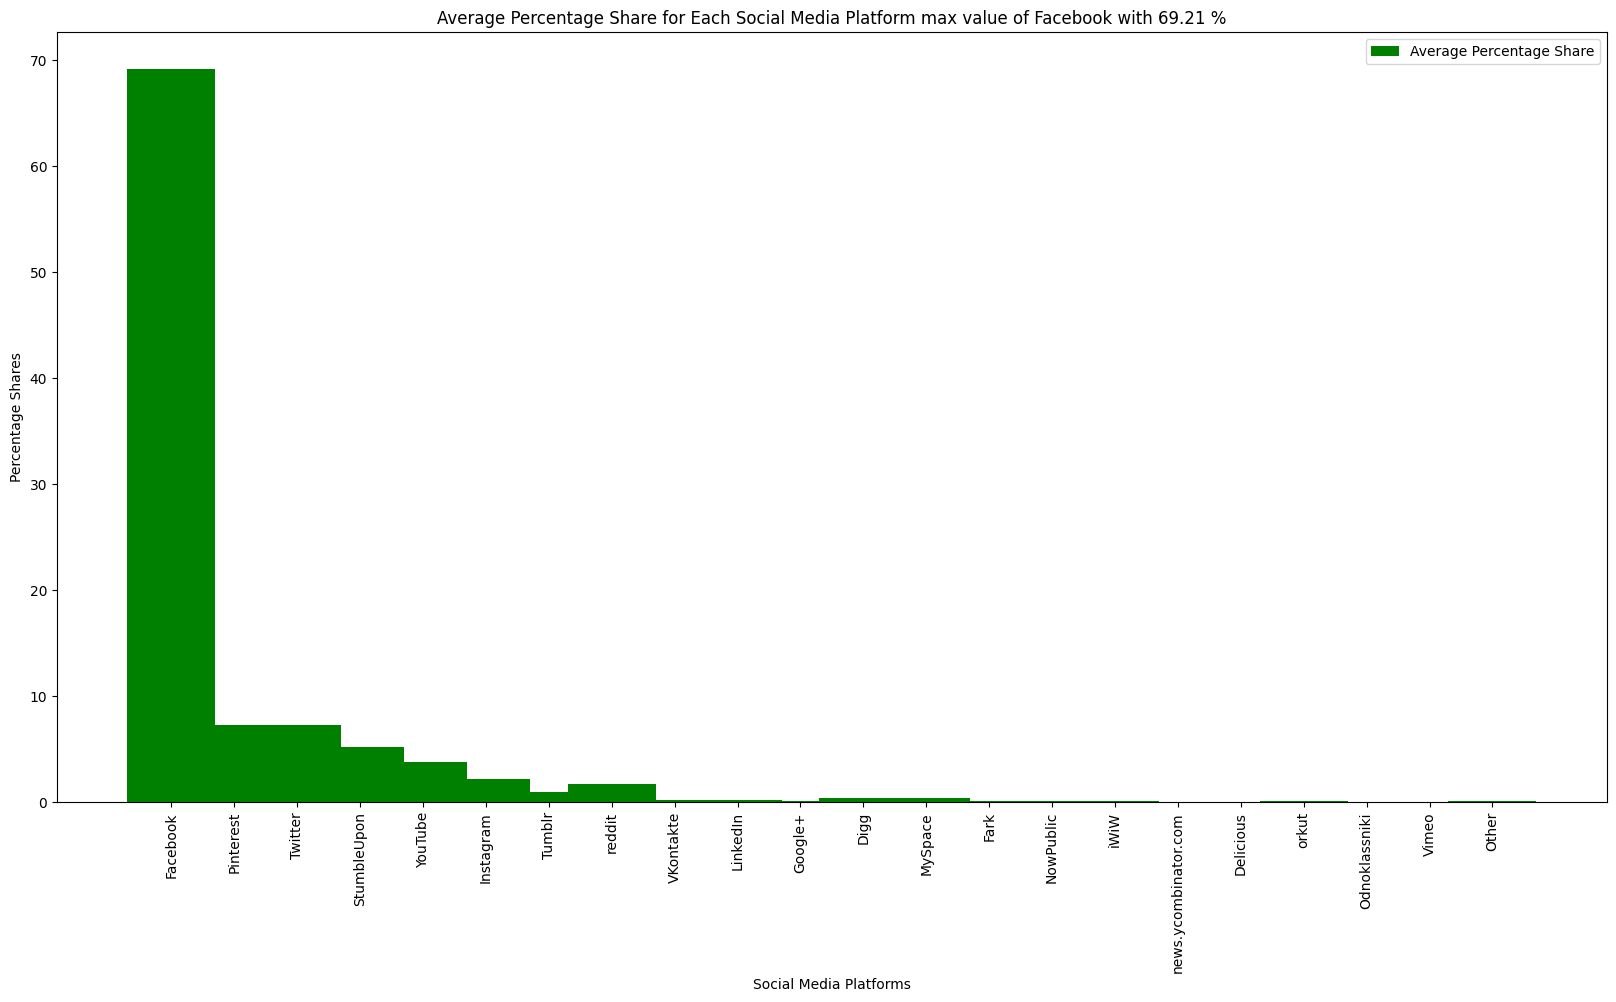

In [ ]:
# Average Shares of the Social Media Platforms


overall_avg_percentage_share = df.iloc[:, 1:].mean().idxmax()
overall_avg_percentage = round(df.iloc[:, 1:].mean().max(),2)

# Create a bar graph
plt.figure(figsize=(20, 10))
plt.bar(df.columns[1:], df.iloc[:, 1:].mean(), color='green', width=1.4, label='Average Percentage Share')
plt.xlabel('Social Media Platforms')
plt.ylabel('Percentage Shares')
plt.title('Average Percentage Share for Each Social Media Platform max value of {} with {} %'.format(overall_avg_percentage_share,overall_avg_percentage))
plt.xticks(rotation=90)
plt.legend()
plt.show()

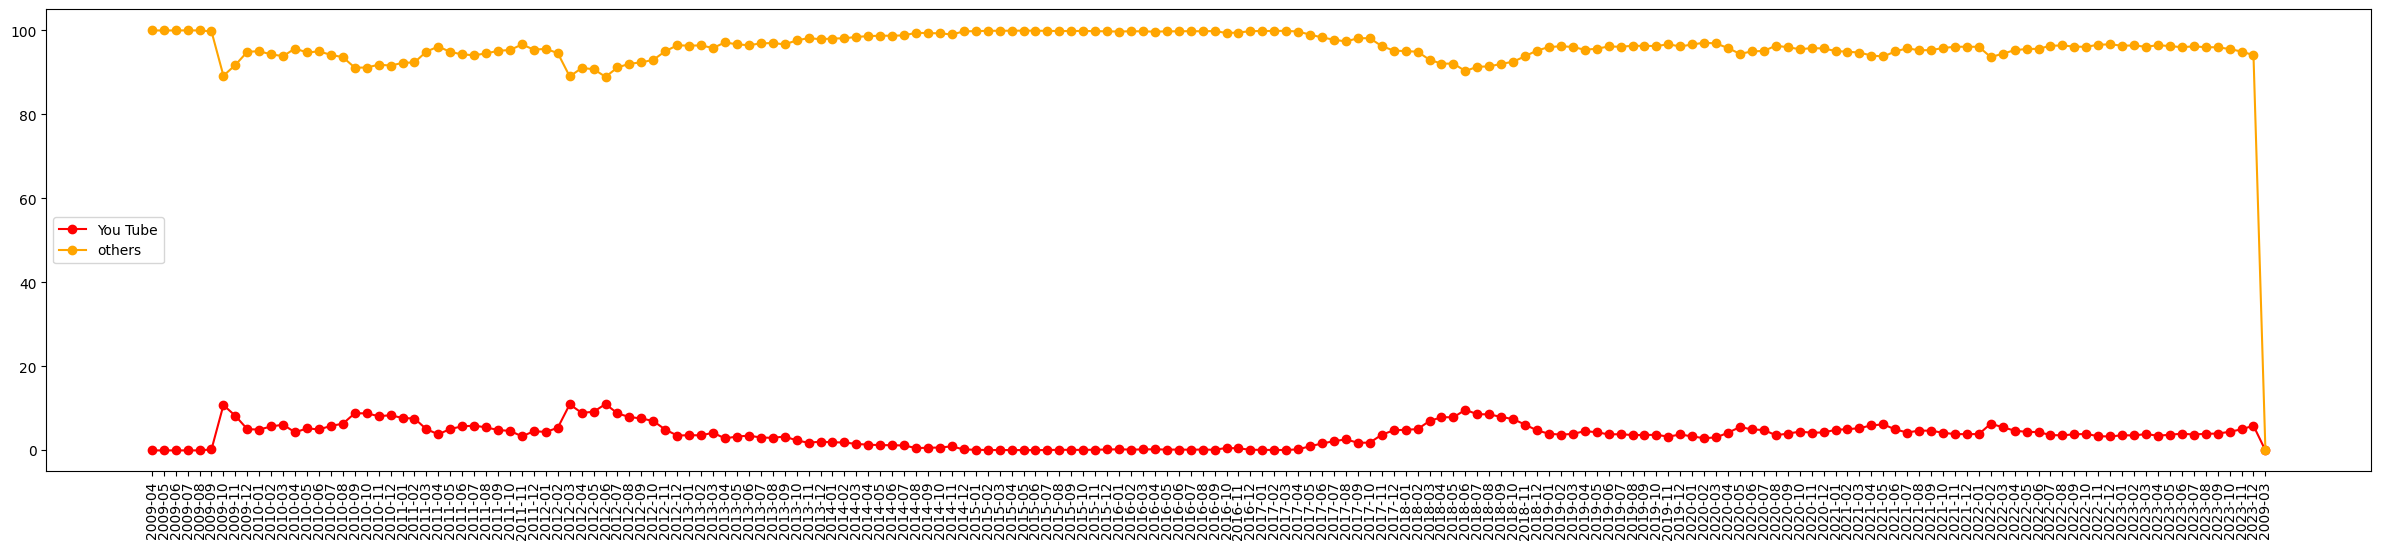

In [ ]:
# How the You Tube popluraity is different from others wrt time

plt.figure(figsize=(30,6))
plt.plot(df['Date'],df['YouTube'],label="You Tube" ,  color="red" , marker="o",linestyle="-")
plt.plot(df['Date'],df.iloc[:,1:].sum(axis=1)- df['YouTube'],label="others" ,  color="orange" , marker="o",linestyle="-")
plt.xticks(rotation=90)
plt.legend()
plt.show()

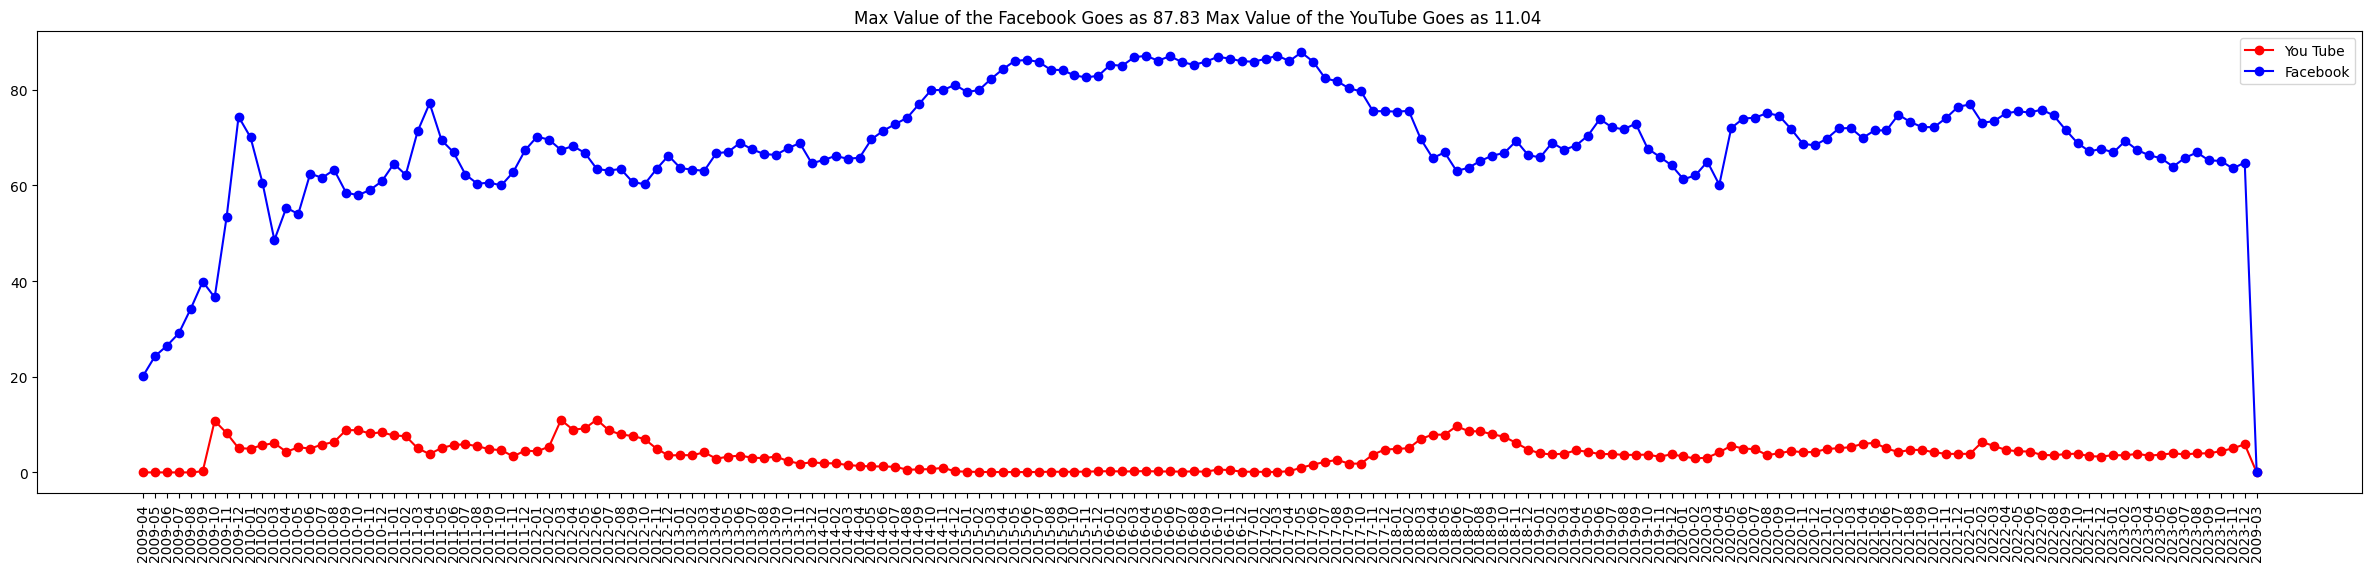

In [ ]:
# How the You Tube popluraity is different from Facebook wrt time

plt.figure(figsize=(30,6))
plt.plot(df['Date'],df['YouTube'],label="You Tube" ,  color="red" , marker="o",linestyle="-")
plt.plot(df['Date'],df['Facebook'],label="Facebook" ,  color="blue" , marker="o",linestyle="-")

max_indexfb = df['Facebook'].idxmax()
max_indexYt = df['YouTube'].idxmax()
plt.xticks(rotation=90)
plt.legend()

plt.title("Max Value of the Facebook Goes as {} Max Value of the YouTube Goes as {} ".format(df['Facebook'][max_indexfb],df['YouTube'][max_indexYt]))
plt.show()


Facebook     64.79
Instagram    10.03
Pinterest     9.97
dtype: float64


Text(0.5, 1.0, 'Latest Share Of Platforms')

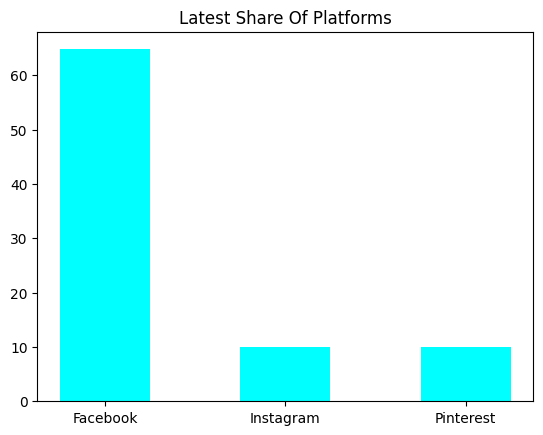

In [ ]:
# Top 3 Social Media Platforms on Latest Date
latest_date = df['Date'][:].max()

latest_data = df[df['Date'] == latest_date]
top3_platforms = latest_data.iloc[:, 1:].mean().nlargest(3)
print(top3_platforms)
# plt.figure(figsize=(20, 10))
plt.bar(top3_platforms.index, top3_platforms.values, color='aqua', width=.5, label='Average Percentage Share')
plt.title("Latest Share Of Platforms")

In [ ]:

# Select the latest date in the dataset
latest_date = df['Date'].max()

# Filter the dataset for the latest date
latest_data = df[df['Date'] == latest_date]

# Reshape the data for Plotly Express
latest_data_long = latest_data.melt(id_vars=['Date'], var_name='Social Media Platform', value_name='Percentage Share')

# Create an interactive bar plot for the percentage shares on the latest date
fig = px.bar(latest_data_long, x='Social Media Platform', y='Percentage Share',
             title=f'Distribution of Percentage Shares on {latest_date}',
             labels={'Percentage Share': 'Percentage Share', 'Social Media Platform': 'Social Media Platform'},
             color='Social Media Platform')

fig.update_layout(xaxis_title='Social Media Platforms', yaxis_title='Percentage Share')
fig.show()


In [ ]:

# Select the latest date in the dataset
latest_date = df['Date'].max()

# Filter the dataset for the latest date
latest_data = df[df['Date'] == latest_date]

# Reshape the data for Plotly Express
latest_data_long = latest_data.melt(id_vars=['Date'], var_name='Social Media Platform', value_name='Percentage Share')

# Create a sunburst chart for the overall percentage share distribution on the latest date
fig = px.sunburst(latest_data_long, path=['Social Media Platform'], values='Percentage Share',
                  title=f'Overall Percentage Share Distribution on {latest_date}')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40), title_x=0.5)
fig.show()

In [ ]:

# Calculate the average percentage share of each platform across the entire time period
avg_percentage_share = df.iloc[:, 1:].mean()

# Create a horizontal bar plot for the average percentage share of each platform
fig = px.bar(avg_percentage_share, orientation='h',
             title='Average Percentage Share of Each Social Media Platform (Overall)',
             labels={'value': 'Average Percentage Share', 'index': 'Social Media Platform'},
             color=avg_percentage_share.index)

fig.update_layout(yaxis_title='Social Media Platforms', xaxis_title='Average Percentage Share')
fig.show()


In [ ]:

# Create a scatter plot to explore the relationship between Facebook and Twitter percentage shares
fig = px.scatter(df, x='Facebook', y='Twitter', title='Scatter Plot: Facebook vs. Twitter Percentage Shares',
                 labels={'Facebook': 'Facebook Percentage Share', 'Twitter': 'Twitter Percentage Share'},
                 hover_data=['Date'])

fig.update_layout(xaxis_title='Facebook Percentage Share', yaxis_title='Twitter Percentage Share')
fig.show()

In [ ]:

# Create a scatter plot to explore the relationship between LinkedIn and Google+ percentage shares
fig = px.scatter(df, x='LinkedIn', y='Google+', title='Scatter Plot: LinkedIn vs. Google+ Percentage Shares',
                 labels={'LinkedIn': 'LinkedIn Percentage Share', 'Google+': 'Google+ Percentage Share'},
                 hover_data=['Date'])

fig.update_layout(xaxis_title='LinkedIn Percentage Share', yaxis_title='Google+ Percentage Share')
fig.show()

In [ ]:
fig = px.scatter(df, x='iWiW', y='news.ycombinator.com',
                 title='Scatter Plot: iWiW vs. news.ycombinator.com Percentage Shares',
                 labels={'iWiW': 'iWiW Percentage Share', 'news.ycombinator.com': 'news.ycombinator.com Percentage Share'},
                 hover_data=['Date'])

fig.update_layout(xaxis_title='iWiW Percentage Share', yaxis_title='news.ycombinator.com Percentage Share')
fig.show()


<ipython-input-21-621bc90ea86a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



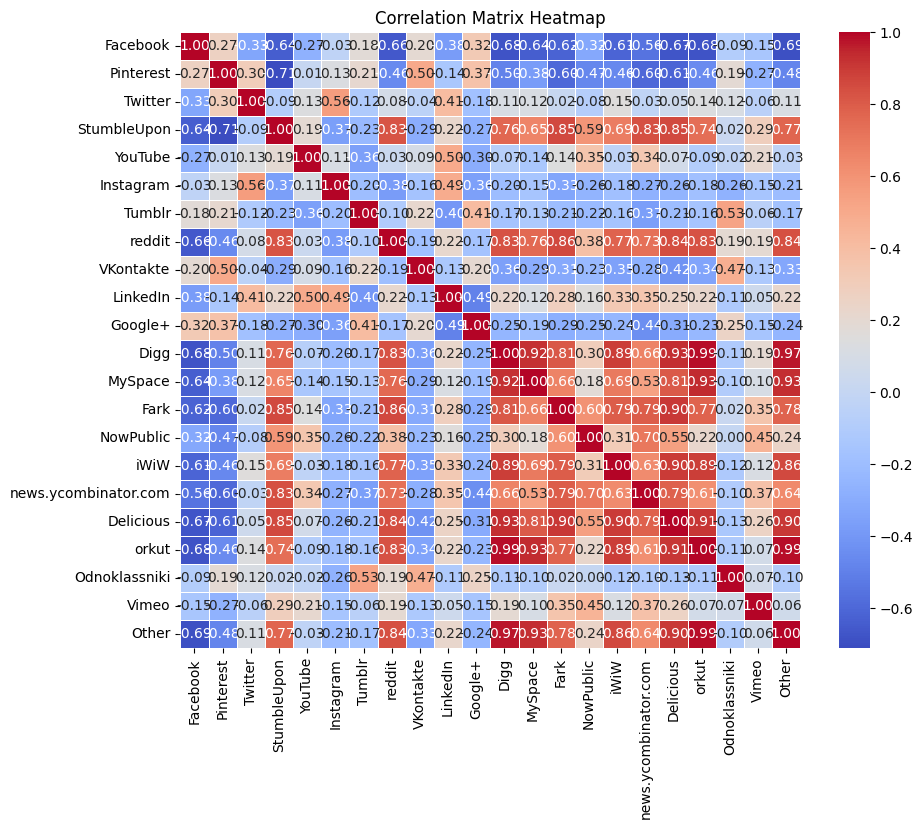

In [21]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()